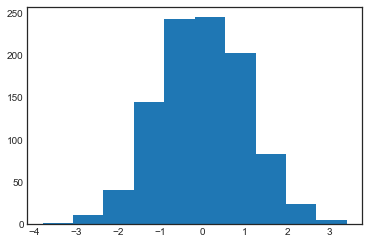

In [6]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
plt.style.use("seaborn-white")

# 간단히 히스토그램을 그리기
data = np.random.randn(1000)

plt.hist(data);

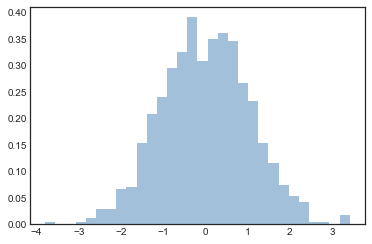

In [9]:
# hist() -> 계산과 표현 모두 조정할 수 있는 많은 옵션 제공
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype="stepfilled", color="steelblue",
         edgecolor="none");

[ 12 185 488 286  29]


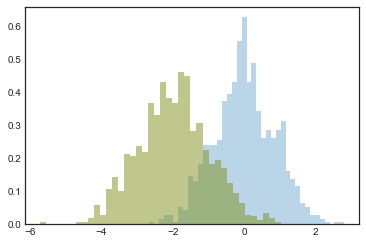

In [28]:
# np.random.normal(mean, std, size)
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype="stepfilled", alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs) # **kwargs = dictionary
plt.hist(x2, **kwargs)
plt.hist(x2, **kwargs);

# 특정 구간에 해당하는 점의 개수
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

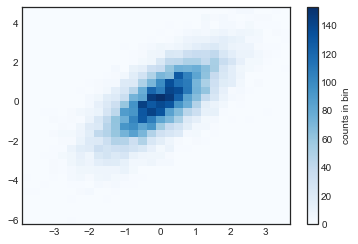

In [35]:
# 2차원 히스토그램과 구간화

# 다변량 가우스 분포 x와 y 배열 정의
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

# plt.hist2d: 2차원 히스토그램
plt.hist2d(x, y, bins=30, cmap="Blues")
cb = plt.colorbar(label="counts in bin");

# plt.hist2d() -> np.histogram2d
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

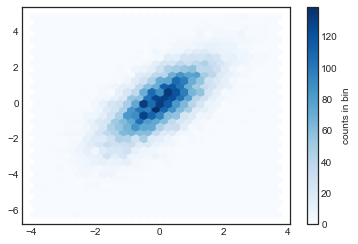

In [37]:
# plt.hexbin: 육각형 구간화
plt.hexbin(x, y, gridsize=30, cmap="Blues")
cb = plt.colorbar(label="counts in bin")

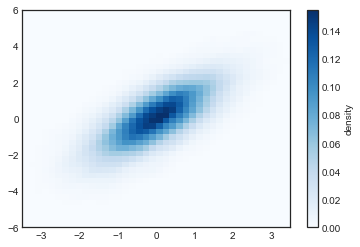

In [38]:
# 커널 밀도 추정
# Kernel Density Estimation

from scipy.stats import gaussian_kde
# 배열 크기 맞추기 [Ndim, Nsamples]
data = np.vstack([x,y])
kde = gaussian_kde(data)

# 정규 그릳르 평가
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)

Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 결과를 이미지로 그리기
plt.imshow(Z.reshape(Xgrid.shape),
           origin="lower", aspect="auto",
           extent=[-3.5, 3.5, -6, 6],
           cmap="Blues")
cb = plt.colorbar()
cb.set_label("density")